# Week 6 - Object Detection (06/10/2025)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

import torchvision
from torchvision import transforms, models

from PIL import Image

## Two-stage detectors: Faster R-CNN

In [2]:
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
    'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [3]:
# Load pretrained faster r-cnn model
model = models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

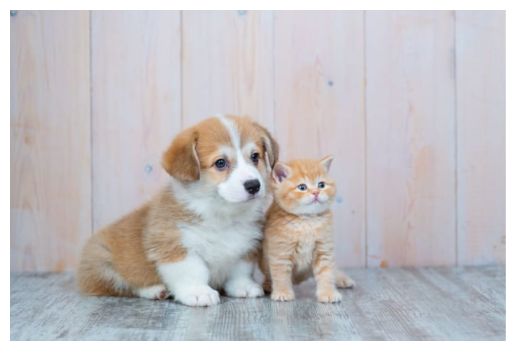

In [4]:
image = Image.open("./images/puppy_and_kitten.jpg")

plt.imshow(image)
plt.axis("off")
plt.show()

In [5]:
def draw_bboxes(image, pred):
    plt.imshow(image.permute(1, 2, 0))
    
    for box, score, label in zip(pred["boxes"], pred["scores"], pred["labels"]):
        if score > 0.7:
            xmin, ymin, xmax, ymax = box
            plt.gca().add_patch(plt.Rectangle(
                xy=(xmin, ymin), 
                width=(xmax - xmin), 
                height=(ymax - ymin), 
                fill=False, color="red", 
                linewidth=2,
            ))
            plt.text(x=xmin, y=ymin - 10, s=f"{COCO_CLASSES[label]}: {score:.2f}", color="red", fontsize=8)
    
    plt.axis("off")
    plt.show()

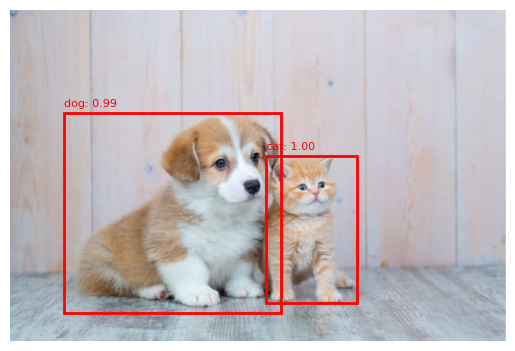

In [6]:
transform = transforms.ToTensor()

image = Image.open("./images/puppy_and_kitten.jpg")
image = transform(image)

# Test the model using the test image
model.eval()

with torch.no_grad():
    pred = model([image])[0]

draw_bboxes(image, pred)

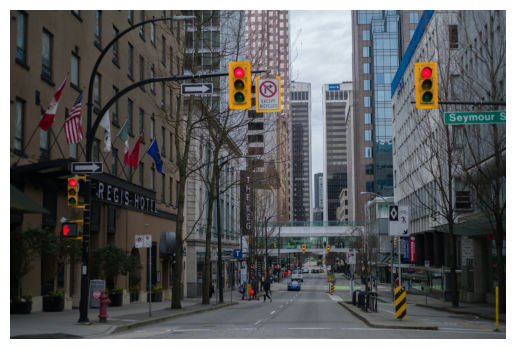

In [7]:
image = Image.open("./images/traffic.jpg")

plt.imshow(image)
plt.axis("off")
plt.show()

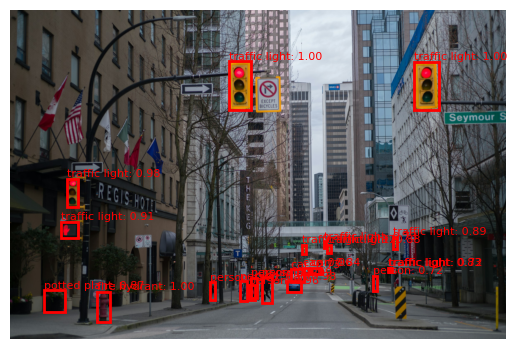

In [8]:
image = Image.open("./images/traffic.jpg")
image = transform(image)

model.eval()

with torch.no_grad():
    pred = model([image])[0]

draw_bboxes(image, pred)

## One-stage Detectors: YOLOv11

In [9]:
from ultralytics import YOLO

In [10]:
model = YOLO("yolov8x.pt")
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_r

In [11]:
import cv2


image 1/1 e:\Documents\ai-for-autonomous-systems\images\puppy_and_kitten.jpg: 448x640 2 cats, 1 dog, 147.8ms
Speed: 9.0ms preprocess, 147.8ms inference, 137.8ms postprocess per image at shape (1, 3, 448, 640)


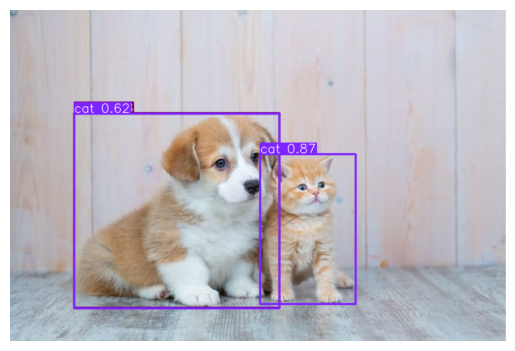

In [12]:
results = model("./images/puppy_and_kitten.jpg")

image = results[0].plot()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()


image 1/1 e:\Documents\ai-for-autonomous-systems\images\traffic.jpg: 448x640 6 persons, 4 cars, 6 traffic lights, 1 fire hydrant, 4 potted plants, 33.0ms
Speed: 3.8ms preprocess, 33.0ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


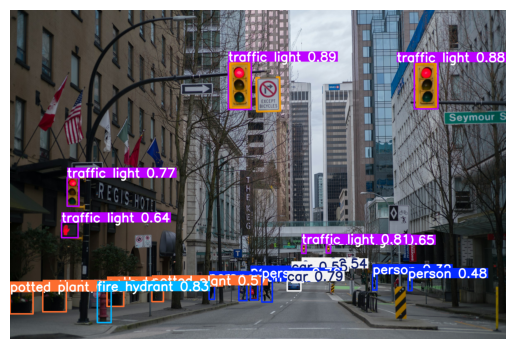

In [13]:
results = model("./images/traffic.jpg")

image = results[0].plot()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()